In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
# Open the trips.csv file
trips = pd.read_csv("C:/Users/kemal/Desktop/bss real/Data2020/trips2020.csv", index_col=0)

C:\Users\kemal\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\kemal\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
trips.head()

,duration,end_date,end_station,end_station_number,End station number.1,member_type,start_date,start_station,start_station_number
0,506.0,01/01/2020 00:09,Rosedale Rec Center,31658.0,NaN,Member,01/01/2020 00:00,Columbus Circle / Union Station,31623.0
1,1050.0,01/01/2020 00:18,Potomac & Pennsylvania Ave SE,31606.0,NaN,Member,01/01/2020 00:01,Eastern Market Metro / Pennsylvania Ave & 7th ...,31613.0
2,1687.0,01/01/2020 00:30,Constitution Ave & 2nd St NW/DOL,31271.0,NaN,Member,01/01/2020 00:02,L'Enfant Plaza / 7th & C St SW,31218.0
3,182.0,01/01/2020 00:05,Gallaudet / 8th St & Florida Ave NE,31508.0,NaN,Member,01/01/2020 00:02,3rd & M St NE,31627.0
4,1002.0,01/01/2020 00:22,10th & G St NW,31274.0,NaN,Member,01/01/2020 00:06,Jefferson Dr & 14th St SW,31247.0


In [5]:
trips.columns

Index(['duration', 'end_date', 'end_station', 'end_station_number',
       'End station number.1', 'member_type', 'start_date', 'start_station',
       'start_station_number'],
      dtype='object')

In [6]:
#Check the types of the trips file
trips.dtypes

duration                float64
end_date                 object
end_station              object
end_station_number      float64
End station number.1     object
member_type              object
start_date               object
start_station            object
start_station_number    float64
dtype: object

In [7]:
# Change type to datetime
trips = trips.astype({"start_date": "datetime64"})
trips = trips.astype({"end_date": "datetime64"})

In [8]:
# Check the types of the trips file
trips.dtypes

duration                       float64
end_date                datetime64[ns]
end_station                     object
end_station_number             float64
End station number.1            object
member_type                     object
start_date              datetime64[ns]
start_station                   object
start_station_number           float64
dtype: object

In [9]:
# Create new columns with the day of the week and the hour of the day using start_date.
trips["start_day"] = trips["start_date"].dt.weekday_name

In [10]:
trips["start_hour"] = trips["start_date"].dt.hour

In [11]:
# Check the head of trips
trips.head()

,duration,end_date,end_station,end_station_number,End station number.1,member_type,start_date,start_station,start_station_number,start_day,start_hour
0,506.0,2020-01-01 00:09:00,Rosedale Rec Center,31658.0,NaN,Member,2020-01-01 00:00:00,Columbus Circle / Union Station,31623.0,Wednesday,0
1,1050.0,2020-01-01 00:18:00,Potomac & Pennsylvania Ave SE,31606.0,NaN,Member,2020-01-01 00:01:00,Eastern Market Metro / Pennsylvania Ave & 7th ...,31613.0,Wednesday,0
2,1687.0,2020-01-01 00:30:00,Constitution Ave & 2nd St NW/DOL,31271.0,NaN,Member,2020-01-01 00:02:00,L'Enfant Plaza / 7th & C St SW,31218.0,Wednesday,0
3,182.0,2020-01-01 00:05:00,Gallaudet / 8th St & Florida Ave NE,31508.0,NaN,Member,2020-01-01 00:02:00,3rd & M St NE,31627.0,Wednesday,0
4,1002.0,2020-01-01 00:22:00,10th & G St NW,31274.0,NaN,Member,2020-01-01 00:06:00,Jefferson Dr & 14th St SW,31247.0,Wednesday,0


In [12]:
# Group by start_hour and start_day and count the number of trips
trips_day_count = trips.groupby(["start_hour","start_day"]).count()

In [13]:
# Check trips_day head
trips_day_count.head()

duration  end_date  end_station  end_station_number  \
start_hour start_day                                                        
0          Friday         2076      2076         1509                1883   
           Monday         1920      1920         1567                1731   
           Saturday       4493      4493         3650                4135   
           Sunday         4080      4080         3526                3800   
           Thursday       2005      2005         1643                1831   

                      End station number.1  member_type  start_date  \
start_hour start_day                                                  
0          Friday                      374         2076        2076   
           Monday                      164         1920        1920   
           Saturday                    485         4493        4493   
           Sunday                      274         4080        4080   
           Thursday                    188         2005        2005   

                      start_station  start_station_number  
start_hour start_day                                       
0          Friday              1893                  1893  
           Monday              1755                  1755  
           Saturday            4147                  4147  
           Sunday              3836                  3836  
           Thursday            1822                  1822

In [14]:
# Use unstack() in order to be able to plot the total number of trips by hour as a function of the day for two years
trips_day_count = trips_day_count['duration'].unstack()

In [15]:
# Divide the total amount of trips by 108 to obtain the average of trips per week
trips_day_count = trips_day_count/108

In [16]:
# Check trip_day_count
trips_day_count

start_day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
start_hour,,,,,,,
0,19.222222,17.777778,41.601852,37.777778,18.564815,22.416667,17.490741
1,9.796296,9.648148,22.787037,19.731481,8.870370,10.981481,9.314815
2,5.750000,4.731481,11.203704,11.861111,4.972222,6.481481,5.574074
3,3.379630,3.657407,6.768519,5.888889,3.018519,3.379630,3.351852
4,5.509259,5.731481,5.240741,5.277778,5.722222,5.907407,5.592593
5,17.814815,18.148148,10.509259,11.453704,20.361111,20.462963,20.444444
6,51.750000,52.111111,32.703704,31.101852,56.990741,57.972222,56.953704
7,105.944444,114.055556,70.703704,65.916667,120.462963,118.129630,119.324074
8,163.685185,169.092593,118.314815,106.453704,181.620370,179.518519,176.935185


Text(0, 0.5, 'Trips number')

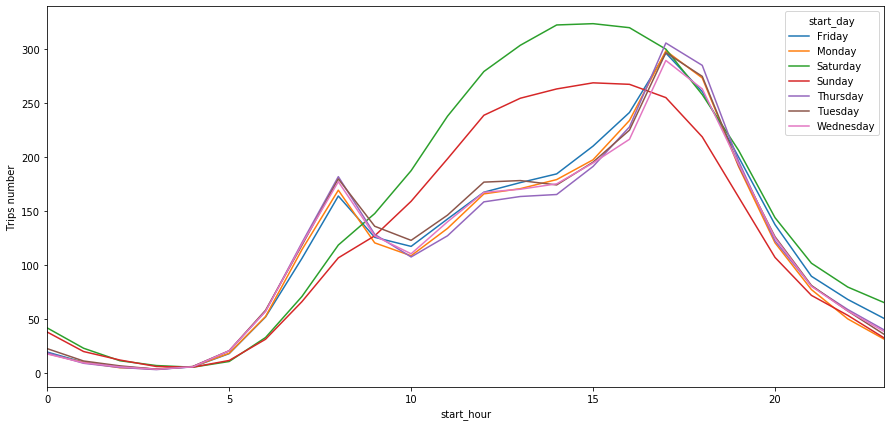

In [17]:
# plot the data to see the number of trips per hour as a function of the days
fig, ax = plt.subplots(figsize=(15,7))
trips_day_count.plot(ax=ax)
plt.ylabel('Trips number')

In [18]:
# Add a column named start_weekday to the trips dataframe that says if the start_day is a weekday or a weekend.
weekday_lst = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
trips['start_weekday'] = ['weekday' if x in weekday_lst else 'weekend' for x in trips['start_day']]

In [19]:
# Check trips head
trips.head()

,duration,end_date,end_station,end_station_number,End station number.1,member_type,start_date,start_station,start_station_number,start_day,start_hour,start_weekday
0,506.0,2020-01-01 00:09:00,Rosedale Rec Center,31658.0,NaN,Member,2020-01-01 00:00:00,Columbus Circle / Union Station,31623.0,Wednesday,0,weekday
1,1050.0,2020-01-01 00:18:00,Potomac & Pennsylvania Ave SE,31606.0,NaN,Member,2020-01-01 00:01:00,Eastern Market Metro / Pennsylvania Ave & 7th ...,31613.0,Wednesday,0,weekday
2,1687.0,2020-01-01 00:30:00,Constitution Ave & 2nd St NW/DOL,31271.0,NaN,Member,2020-01-01 00:02:00,L'Enfant Plaza / 7th & C St SW,31218.0,Wednesday,0,weekday
3,182.0,2020-01-01 00:05:00,Gallaudet / 8th St & Florida Ave NE,31508.0,NaN,Member,2020-01-01 00:02:00,3rd & M St NE,31627.0,Wednesday,0,weekday
4,1002.0,2020-01-01 00:22:00,10th & G St NW,31274.0,NaN,Member,2020-01-01 00:06:00,Jefferson Dr & 14th St SW,31247.0,Wednesday,0,weekday


In [20]:
# Create trips_weekday dataframe with only the weekdays by removing all weekend days
trips_weekday = trips[~trips.start_weekday.str.contains("weekend")]

In [21]:
# Check trips_weekday head
trips_weekday.head()

,duration,end_date,end_station,end_station_number,End station number.1,member_type,start_date,start_station,start_station_number,start_day,start_hour,start_weekday
0,506.0,2020-01-01 00:09:00,Rosedale Rec Center,31658.0,NaN,Member,2020-01-01 00:00:00,Columbus Circle / Union Station,31623.0,Wednesday,0,weekday
1,1050.0,2020-01-01 00:18:00,Potomac & Pennsylvania Ave SE,31606.0,NaN,Member,2020-01-01 00:01:00,Eastern Market Metro / Pennsylvania Ave & 7th ...,31613.0,Wednesday,0,weekday
2,1687.0,2020-01-01 00:30:00,Constitution Ave & 2nd St NW/DOL,31271.0,NaN,Member,2020-01-01 00:02:00,L'Enfant Plaza / 7th & C St SW,31218.0,Wednesday,0,weekday
3,182.0,2020-01-01 00:05:00,Gallaudet / 8th St & Florida Ave NE,31508.0,NaN,Member,2020-01-01 00:02:00,3rd & M St NE,31627.0,Wednesday,0,weekday
4,1002.0,2020-01-01 00:22:00,10th & G St NW,31274.0,NaN,Member,2020-01-01 00:06:00,Jefferson Dr & 14th St SW,31247.0,Wednesday,0,weekday


In [22]:
# Group by start_hour and start_station_number and count the number of trips
trips_station = trips_weekday.groupby(["start_hour","start_station_number"]).count()

In [23]:
# Use unstack() in order to be able to plot the total number of trips by hour as a function of the day for two years
trips_station = trips_station['duration'].unstack()

In [24]:
trips_station

start_station_number,0.0,31000.0,31001.0,31002.0,31003.0,31004.0,31005.0,31006.0,31007.0,31009.0,...,32603.0,32604.0,32605.0,32606.0,32607.0,32608.0,32609.0,32900.0,32901.0,32902.0
start_hour,,,,,,,,,,,,,,,,,,,,,
0,NaN,6.0,3.0,2.0,5.0,1.0,8.0,18.0,5.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,6.0,8.0,NaN,4.0,3.0,2.0,3.0,...,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN
2,NaN,2.0,1.0,1.0,6.0,NaN,7.0,3.0,2.0,6.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1.0,3.0,1.0,2.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,3.0,NaN,NaN,NaN,1.0,17.0,NaN,NaN,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,1.0,NaN,8.0,2.0,2.0,2.0,2.0,9.0,6.0,...,4.0,2.0,NaN,5.0,4.0,NaN,3.0,5.0,NaN,NaN
6,NaN,7.0,6.0,30.0,50.0,2.0,15.0,20.0,31.0,11.0,...,1.0,1.0,6.0,24.0,8.0,1.0,1.0,33.0,NaN,NaN
7,4.0,18.0,16.0,72.0,29.0,17.0,27.0,88.0,109.0,10.0,...,17.0,3.0,8.0,18.0,7.0,8.0,9.0,46.0,NaN,NaN
8,9.0,40.0,29.0,105.0,68.0,54.0,57.0,111.0,239.0,13.0,...,13.0,6.0,15.0,39.0,5.0,8.0,27.0,22.0,NaN,NaN


In [25]:
# Evaluate the number of NaN's
trips_station.isna().sum()

start_station_number
0.0         6
31000.0     1
31001.0     3
31002.0     1
31003.0     1
           ..
32608.0     7
32609.0     5
32900.0    15
32901.0    19
32902.0    21
Length: 626, dtype: int64

In [26]:
# Remove all stations that have more than two NaN's
trips_station = trips_station.dropna(thresh=len(trips_station) - 2, axis=1)

In [27]:
# Replace the NaN's by 0
trips_station = trips_station.fillna(0)

In [28]:
trips_station

start_station_number,31000.0,31002.0,31003.0,31004.0,31005.0,31006.0,31007.0,31009.0,31011.0,31012.0,...,32404.0,32406.0,32410.0,32412.0,32413.0,32416.0,32418.0,32419.0,32421.0,32422.0
start_hour,,,,,,,,,,,,,,,,,,,,,
0,6.0,2.0,5.0,1.0,8.0,18.0,5.0,11.0,15.0,3.0,...,2.0,11.0,2.0,2.0,2.0,4.0,8.0,2.0,1.0,1.0
1,1.0,6.0,8.0,0.0,4.0,3.0,2.0,3.0,4.0,0.0,...,0.0,11.0,3.0,2.0,4.0,3.0,4.0,1.0,6.0,2.0
2,2.0,1.0,6.0,0.0,7.0,3.0,2.0,6.0,2.0,2.0,...,2.0,8.0,3.0,4.0,2.0,1.0,9.0,0.0,0.0,3.0
3,0.0,1.0,3.0,1.0,2.0,3.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
4,3.0,0.0,0.0,1.0,17.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0,2.0
5,1.0,8.0,2.0,2.0,2.0,2.0,9.0,6.0,5.0,1.0,...,1.0,7.0,3.0,0.0,3.0,5.0,1.0,1.0,4.0,1.0
6,7.0,30.0,50.0,2.0,15.0,20.0,31.0,11.0,21.0,4.0,...,3.0,4.0,5.0,3.0,7.0,141.0,9.0,1.0,9.0,7.0
7,18.0,72.0,29.0,17.0,27.0,88.0,109.0,10.0,43.0,10.0,...,12.0,4.0,37.0,3.0,15.0,24.0,28.0,5.0,39.0,4.0
8,40.0,105.0,68.0,54.0,57.0,111.0,239.0,13.0,77.0,16.0,...,13.0,8.0,29.0,6.0,24.0,32.0,40.0,6.0,37.0,27.0


In [29]:
# Select the data for stations number 31245 and 31018
trips_station_comparison = trips_station[[31245, 31018]]

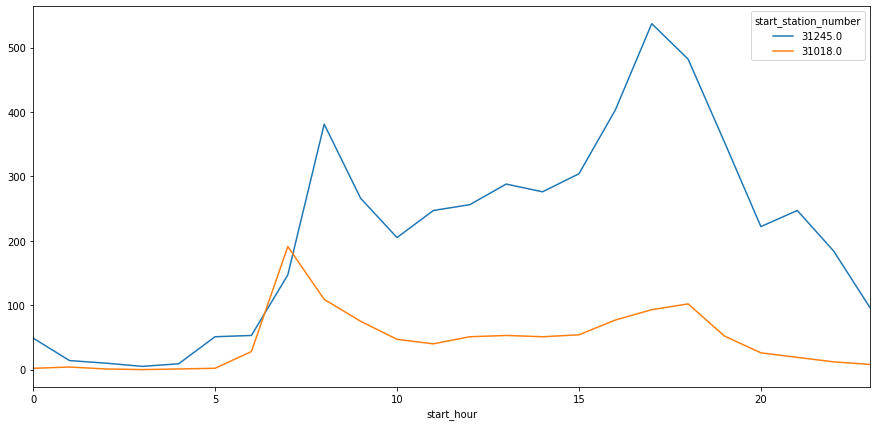

In [56]:
# Print the graphs for the two stations
fig, ax = plt.subplots(figsize=(15,7))
trips_station_comparison.plot(ax=ax)

In [31]:
# Normalize the time series for all stations using the apply method.
trips_station_normal = trips_station.apply(lambda x: (x-min(x))/(max(x)-min(x)), axis=0)

In [32]:
trips_station_normal

start_station_number,31000.0,31002.0,31003.0,31004.0,31005.0,31006.0,31007.0,31009.0,31011.0,31012.0,...,32404.0,32406.0,32410.0,32412.0,32413.0,32416.0,32418.0,32419.0,32421.0,32422.0
start_hour,,,,,,,,,,,,,,,,,,,,,
0,0.063830,0.007722,0.021834,0.011628,0.016667,0.066667,0.012690,0.104762,0.043228,0.024194,...,0.083333,0.166667,0.029851,0.117647,0.046512,0.028369,0.111111,0.117647,0.012658,0.000000
1,0.010638,0.023166,0.034934,0.000000,0.005556,0.011111,0.005076,0.028571,0.011527,0.000000,...,0.000000,0.166667,0.044776,0.117647,0.093023,0.021277,0.055556,0.058824,0.075949,0.009259
2,0.021277,0.003861,0.026201,0.000000,0.013889,0.011111,0.005076,0.057143,0.005764,0.016129,...,0.083333,0.121212,0.044776,0.235294,0.046512,0.007092,0.125000,0.000000,0.000000,0.018519
3,0.000000,0.003861,0.013100,0.011628,0.000000,0.011111,0.000000,0.000000,0.000000,0.008065,...,0.041667,0.015152,0.000000,0.000000,0.000000,0.000000,0.013889,0.000000,0.012658,0.000000
4,0.031915,0.000000,0.000000,0.011628,0.041667,0.000000,0.000000,0.009524,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.058824,0.000000,0.007092,0.000000,0.058824,0.037975,0.009259
5,0.010638,0.030888,0.008734,0.023256,0.000000,0.007407,0.022843,0.057143,0.014409,0.008065,...,0.041667,0.106061,0.044776,0.000000,0.069767,0.035461,0.013889,0.058824,0.050633,0.000000
6,0.074468,0.115830,0.218341,0.023256,0.036111,0.074074,0.078680,0.104762,0.060519,0.032258,...,0.125000,0.060606,0.074627,0.176471,0.162791,1.000000,0.125000,0.058824,0.113924,0.055556
7,0.191489,0.277992,0.126638,0.197674,0.069444,0.325926,0.276650,0.095238,0.123919,0.080645,...,0.500000,0.060606,0.552239,0.176471,0.348837,0.170213,0.388889,0.294118,0.493671,0.027778
8,0.425532,0.405405,0.296943,0.627907,0.152778,0.411111,0.606599,0.123810,0.221902,0.129032,...,0.541667,0.121212,0.432836,0.352941,0.558140,0.226950,0.555556,0.352941,0.468354,0.240741


In [33]:
# Transpose the dataframe in order to be able to apply the k-means model on each bike station.
trips_station_normal_trans = trips_station_normal.transpose()

In [34]:
# Transform the trips_station_normal_trans dataframe to an array in order to be able to use k-means method
X = trips_station_normal_trans.to_numpy()

In [35]:
# Fit the kmeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [36]:
# See the label array and assign it to a variable called label
kmeans.labels_

array([2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0,
       0, 0, 2, 2, 2, 1, 0, 1, 2, 0, 1, 2, 1, 1, 2, 1, 0, 0, 1, 2, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2,
       2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 1, 0, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1,
       2, 2, 1, 2, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1,
       0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1,
       0, 2, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 0, 1, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1,

In [37]:
# Add the label array to the trips_station_normal_trans array
array_cluster = np.column_stack((trips_station_normal_trans,kmeans.labels_))

In [38]:
# Transform the array into a dataframe
trips_station_normal_trans = pd.DataFrame(array_cluster)

In [39]:
# Transpose the dataframe to have the cluster number for each station in the dataframe
trips_station_normal_cluster = trips_station_normal_trans.transpose()

In [40]:
trips_station_normal_cluster

,0,1,2,3,4,5,6,7,8,9,...,388,389,390,391,392,393,394,395,396,397
0,0.063830,0.007722,0.021834,0.011628,0.016667,0.066667,0.012690,0.104762,0.043228,0.024194,...,0.083333,0.166667,0.029851,0.117647,0.046512,0.028369,0.111111,0.117647,0.012658,0.000000
1,0.010638,0.023166,0.034934,0.000000,0.005556,0.011111,0.005076,0.028571,0.011527,0.000000,...,0.000000,0.166667,0.044776,0.117647,0.093023,0.021277,0.055556,0.058824,0.075949,0.009259
2,0.021277,0.003861,0.026201,0.000000,0.013889,0.011111,0.005076,0.057143,0.005764,0.016129,...,0.083333,0.121212,0.044776,0.235294,0.046512,0.007092,0.125000,0.000000,0.000000,0.018519
3,0.000000,0.003861,0.013100,0.011628,0.000000,0.011111,0.000000,0.000000,0.000000,0.008065,...,0.041667,0.015152,0.000000,0.000000,0.000000,0.000000,0.013889,0.000000,0.012658,0.000000
4,0.031915,0.000000,0.000000,0.011628,0.041667,0.000000,0.000000,0.009524,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.058824,0.000000,0.007092,0.000000,0.058824,0.037975,0.009259
5,0.010638,0.030888,0.008734,0.023256,0.000000,0.007407,0.022843,0.057143,0.014409,0.008065,...,0.041667,0.106061,0.044776,0.000000,0.069767,0.035461,0.013889,0.058824,0.050633,0.000000
6,0.074468,0.115830,0.218341,0.023256,0.036111,0.074074,0.078680,0.104762,0.060519,0.032258,...,0.125000,0.060606,0.074627,0.176471,0.162791,1.000000,0.125000,0.058824,0.113924,0.055556
7,0.191489,0.277992,0.126638,0.197674,0.069444,0.325926,0.276650,0.095238,0.123919,0.080645,...,0.500000,0.060606,0.552239,0.176471,0.348837,0.170213,0.388889,0.294118,0.493671,0.027778
8,0.425532,0.405405,0.296943,0.627907,0.152778,0.411111,0.606599,0.123810,0.221902,0.129032,...,0.541667,0.121212,0.432836,0.352941,0.558140,0.226950,0.555556,0.352941,0.468354,0.240741
9,0.489362,0.366795,0.336245,0.162791,0.102778,0.303704,0.243655,0.200000,0.247839,0.153226,...,0.291667,0.287879,0.223881,0.294118,0.372093,0.070922,0.541667,0.411765,0.291139,0.490741


In [41]:
# Select the stations that are part of cluster 0 (i.e. that have index 24 = 0)
trips_station_normal_cluster0 = trips_station_normal_cluster[trips_station_normal_cluster.columns[trips_station_normal_cluster.iloc[-1]==0.000000]]

In [42]:
# Check if it worked
trips_station_normal_cluster0

,3,4,6,7,8,9,10,11,14,23,...,374,378,382,383,385,386,390,391,393,397
0,0.011628,0.016667,0.012690,0.104762,0.043228,0.024194,0.112299,0.043478,0.035714,0.054622,...,0.016393,0.140351,0.777778,0.020408,0.027778,0.428571,0.029851,0.117647,0.028369,0.000000
1,0.000000,0.005556,0.005076,0.028571,0.011527,0.000000,0.074866,0.033333,0.022321,0.033613,...,0.010929,0.052632,0.166667,0.020408,0.027778,0.000000,0.044776,0.117647,0.021277,0.009259
2,0.000000,0.013889,0.005076,0.057143,0.005764,0.016129,0.010695,0.002899,0.013393,0.021008,...,0.000000,0.000000,0.055556,0.000000,0.000000,0.142857,0.044776,0.235294,0.007092,0.018519
3,0.011628,0.000000,0.000000,0.000000,0.000000,0.008065,0.005348,0.000000,0.004464,0.000000,...,0.005464,0.000000,0.111111,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.011628,0.041667,0.000000,0.009524,0.000000,0.000000,0.005348,0.001449,0.008929,0.000000,...,0.000000,0.017544,0.055556,0.020408,0.027778,0.071429,0.000000,0.058824,0.007092,0.009259
5,0.023256,0.000000,0.022843,0.057143,0.014409,0.008065,0.000000,0.026087,0.000000,0.012605,...,0.251366,0.017544,0.000000,0.000000,0.027778,0.857143,0.044776,0.000000,0.035461,0.000000
6,0.023256,0.036111,0.078680,0.104762,0.060519,0.032258,0.208556,0.095652,0.031250,0.243697,...,0.278689,0.035088,0.055556,0.020408,0.055556,0.285714,0.074627,0.176471,1.000000,0.055556
7,0.197674,0.069444,0.276650,0.095238,0.123919,0.080645,0.155080,0.133333,0.089286,0.159664,...,0.262295,0.087719,0.111111,0.265306,0.027778,0.285714,0.552239,0.176471,0.170213,0.027778
8,0.627907,0.152778,0.606599,0.123810,0.221902,0.129032,0.320856,0.284058,0.129464,0.315126,...,0.213115,0.087719,0.000000,1.000000,0.166667,0.142857,0.432836,0.352941,0.226950,0.240741
9,0.162791,0.102778,0.243655,0.200000,0.247839,0.153226,0.379679,0.297101,0.294643,0.247899,...,0.218579,0.122807,0.166667,0.244898,0.027778,0.214286,0.223881,0.294118,0.070922,0.490741


In [43]:
# Remove the last row of the previous dataframe
trips_station_normal_cluster0 = trips_station_normal_cluster0.drop([24])

In [44]:
# Add a column that gives the average of all previous columns
trips_station_normal_cluster0['average'] = trips_station_normal_cluster0.mean(numeric_only=True, axis=1)

In [45]:
trips_station_normal_cluster0.head()

,3,4,6,7,8,9,10,11,14,23,...,378,382,383,385,386,390,391,393,397,average
0,0.011628,0.016667,0.012690,0.104762,0.043228,0.024194,0.112299,0.043478,0.035714,0.054622,...,0.140351,0.777778,0.020408,0.027778,0.428571,0.029851,0.117647,0.028369,0.000000,0.055888
1,0.000000,0.005556,0.005076,0.028571,0.011527,0.000000,0.074866,0.033333,0.022321,0.033613,...,0.052632,0.166667,0.020408,0.027778,0.000000,0.044776,0.117647,0.021277,0.009259,0.027598
2,0.000000,0.013889,0.005076,0.057143,0.005764,0.016129,0.010695,0.002899,0.013393,0.021008,...,0.000000,0.055556,0.000000,0.000000,0.142857,0.044776,0.235294,0.007092,0.018519,0.014562
3,0.011628,0.000000,0.000000,0.000000,0.000000,0.008065,0.005348,0.000000,0.004464,0.000000,...,0.000000,0.111111,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008959
4,0.011628,0.041667,0.000000,0.009524,0.000000,0.000000,0.005348,0.001449,0.008929,0.000000,...,0.017544,0.055556,0.020408,0.027778,0.071429,0.000000,0.058824,0.007092,0.009259,0.013597


Text(0.5, 0, 'Hour')

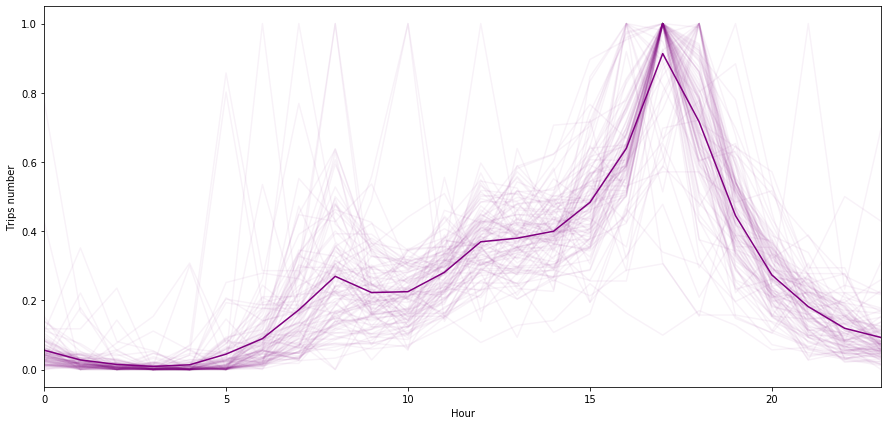

In [46]:
# Plot all the normalised curves for cluster 0 and the average
fig, ax = plt.subplots(figsize=(15,7))
trips_station_normal_cluster0.plot(ax=ax,color='purple', alpha=0.05)
trips_station_normal_cluster0["average"].plot(ax=ax,color='purple', alpha=1)
ax.get_legend().remove()
plt.ylabel('Trips number')
plt.xlabel('Hour')

In [47]:
# Select the stations that are part of cluster 1 (i.e. that have index 24 = 1)
trips_station_normal_cluster1 = trips_station_normal_cluster[trips_station_normal_cluster.columns[trips_station_normal_cluster.iloc[-1]==1.000000]]

In [48]:
# Remove the last row of the previous dataframe
trips_station_normal_cluster1 = trips_station_normal_cluster1.drop([24])

In [49]:
# Add a column that gives the average of all previous columns
trips_station_normal_cluster1['average'] = trips_station_normal_cluster1.mean(numeric_only=True, axis=1)

Text(0.5, 0, 'Hour')

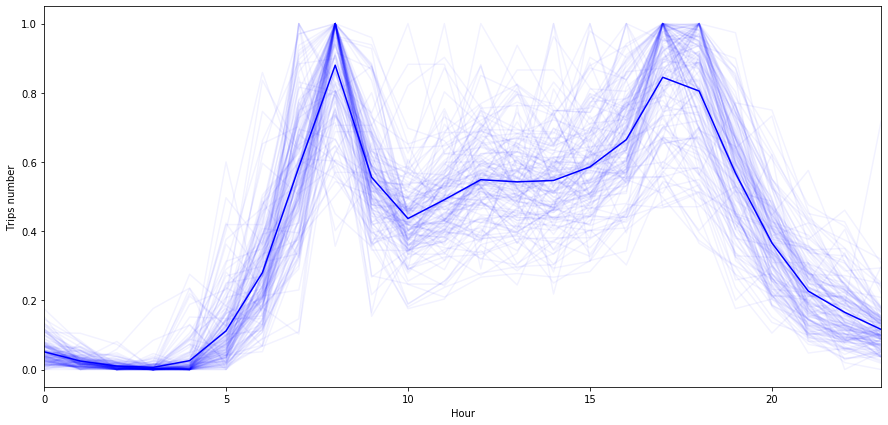

In [50]:
# Plot all the normalised curves for cluster 0 and the average
fig, ax = plt.subplots(figsize=(15,7))
trips_station_normal_cluster1.plot(ax=ax,color='blue', alpha=0.05)
trips_station_normal_cluster1["average"].plot(ax=ax,color='blue', alpha=1)
ax.get_legend().remove()
plt.ylabel('Trips number')
plt.xlabel('Hour')

In [51]:
# Select the stations that are part of cluster 2 (i.e. that have index 24 = 2)
trips_station_normal_cluster2 = trips_station_normal_cluster[trips_station_normal_cluster.columns[trips_station_normal_cluster.iloc[-1]==2.000000]]

In [52]:
# Remove the last row of the previous dataframe
trips_station_normal_cluster2 = trips_station_normal_cluster2.drop([24])

In [53]:
# Add a column that gives the average of all previous columns
trips_station_normal_cluster2['average'] = trips_station_normal_cluster2.mean(numeric_only=True, axis=1)

Text(0.5, 0, 'Hour')

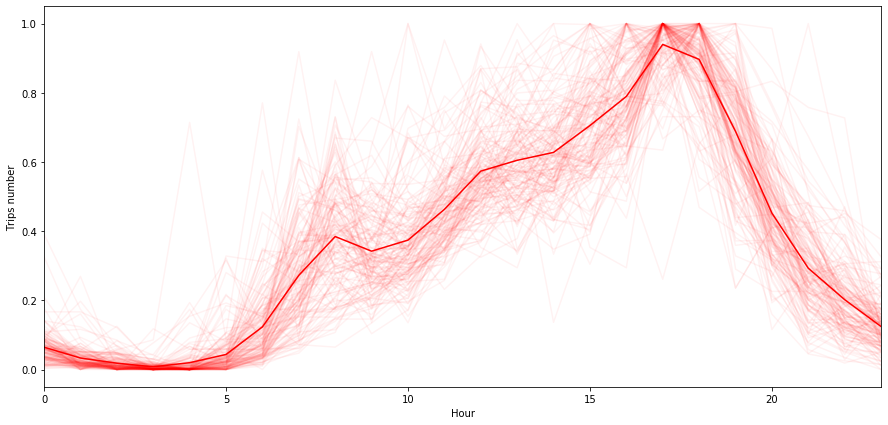

In [54]:
# Plot all the normalised curves for cluster 0 and the average
fig, ax = plt.subplots(figsize=(15,7))
trips_station_normal_cluster2.plot(ax=ax,color='red', alpha=0.05)
trips_station_normal_cluster2["average"].plot(ax=ax,color='red', alpha=1)
ax.get_legend().remove()
plt.ylabel('Trips number')
plt.xlabel('Hour')